<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema03/06-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14

# Entrenamiento estocástico y por bloques

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
session = tf.Session()

In [0]:
batch_size = 25

In [0]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

In [0]:
x_data = tf.placeholder(shape=[None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [0]:
my_prediction = tf.matmul(x_data, A)

In [0]:
# FUNCION DE PERDIDA
loss = tf.reduce_mean(tf.square(my_prediction-y_target))# reduce_mean: reducior a un solo valora calculando la media

In [0]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.025)
train_step = my_optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
session.run(init)

In [34]:
# EL ENTRENAMIENTO POR BLOQUES:
loss_batch = []
for i in range(200):
    rand_index = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_batch.append(temp_loss)

Paso #5 A=[[2.8164134]]
Loss: 51.5044
Paso #10 A=[[4.4193773]]
Loss: 32.614586
Paso #15 A=[[5.67399]]
Loss: 21.28525
Paso #20 A=[[6.6439776]]
Loss: 10.42443
Paso #25 A=[[7.392861]]
Loss: 7.5948553
Paso #30 A=[[7.9647098]]
Loss: 4.0197387
Paso #35 A=[[8.402622]]
Loss: 2.5631957
Paso #40 A=[[8.749522]]
Loss: 2.7581294
Paso #45 A=[[9.047038]]
Loss: 2.7052896
Paso #50 A=[[9.262484]]
Loss: 1.45542
Paso #55 A=[[9.409717]]
Loss: 0.57170165
Paso #60 A=[[9.543932]]
Loss: 1.3307277
Paso #65 A=[[9.645735]]
Loss: 1.0307968
Paso #70 A=[[9.7393]]
Loss: 0.7579573
Paso #75 A=[[9.773131]]
Loss: 1.0227455
Paso #80 A=[[9.8338375]]
Loss: 1.1249692
Paso #85 A=[[9.86302]]
Loss: 1.149787
Paso #90 A=[[9.889319]]
Loss: 0.64583725
Paso #95 A=[[9.888662]]
Loss: 1.1435848
Paso #100 A=[[9.919438]]
Loss: 0.55376977
Paso #105 A=[[9.938085]]
Loss: 1.0421137
Paso #110 A=[[9.934745]]
Loss: 0.5872683
Paso #115 A=[[9.922988]]
Loss: 0.5579542
Paso #120 A=[[9.908825]]
Loss: 1.0778813
Paso #125 A=[[9.910637]]
Loss: 0.704267

In [45]:
# METODO POR PERDITO STOCKASTICO (elije aleatorio un solo elemetno)
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size=1)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1)%5 == 0:
        print("Paso #"+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        print("Loss: "+str(temp_loss))
        loss_stochastic.append(temp_loss)

Paso #5 A=[[3.4648173]]
Loss: 42.343616
Paso #10 A=[[4.9367795]]
Loss: 32.136604
Paso #15 A=[[6.0811863]]
Loss: 14.566911
Paso #20 A=[[6.963864]]
Loss: 10.513366
Paso #25 A=[[7.6512284]]
Loss: 2.7506278
Paso #30 A=[[8.14285]]
Loss: 2.756391
Paso #35 A=[[8.643411]]
Loss: 2.7439601
Paso #40 A=[[8.943946]]
Loss: 0.027839271
Paso #45 A=[[9.186192]]
Loss: 0.10197118
Paso #50 A=[[9.3519335]]
Loss: 0.17801312
Paso #55 A=[[9.617778]]
Loss: 2.519392
Paso #60 A=[[9.632128]]
Loss: 0.7937736
Paso #65 A=[[9.660272]]
Loss: 2.9784894
Paso #70 A=[[9.839921]]
Loss: 0.9412317
Paso #75 A=[[10.015671]]
Loss: 1.5356654
Paso #80 A=[[9.833382]]
Loss: 0.3353078
Paso #85 A=[[9.831227]]
Loss: 0.49018133
Paso #90 A=[[9.915969]]
Loss: 0.012432841
Paso #95 A=[[9.824347]]
Loss: 0.92600167
Paso #100 A=[[9.63708]]
Loss: 0.8037834
Paso #105 A=[[9.845038]]
Loss: 0.08503014
Paso #110 A=[[9.986786]]
Loss: 3.9736269
Paso #115 A=[[9.824263]]
Loss: 1.5465003
Paso #120 A=[[10.005811]]
Loss: 1.2478032
Paso #125 A=[[9.999348]]

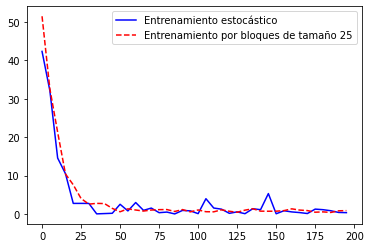

In [46]:
plt.plot(range(0,200,5), loss_stochastic, 'b-', label = "Entrenamiento estocástico")# 'b-': azul y rayitas
plt.plot(range(0,200,5), loss_batch, 'r--', label = "Entrenamiento por bloques de tamaño 25")#'r--': rojo con raytas
plt.legend(loc="upper right", prop={'size':10})
plt.show()